https://jehyunlee.github.io/2020/10/03/Python-DS-35-seaborn_matplotlib2/



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] # setting figure size

In [ ]:
penguins = sns.load_dataset("penguins")  # 펭귄 데이터셋으로 시작합니다.

In [119]:
main_path = '/content/drive/MyDrive/Project/LiveCommerse/'
# file_path = main_path + 'FUCKUGOOGLE/종합몰_g-DMR/종합몰_Score_DF.xlsx'
file_path = main_path + 'FUCKUGOOGLE/투어전문몰_g-DMR/투어전문몰_Score_DF.xlsx'

In [120]:
dff = pd.read_excel(file_path)
dff.head(10)

,Unnamed: 0,K_Num,Remove_Top,Min_Df,Min_Cf,C_S_Umass,C_S_Cuci,C_S_Cnpmi,C_S_Cv
0,0,2,0,0,0,-0.082798,-0.018297,0.001251,0.416769
1,1,2,0,0,5,-0.098612,0.002209,0.006414,0.432628
2,2,2,0,0,10,-0.100229,0.002209,0.006414,0.432628
3,3,2,0,0,15,-0.081421,-0.018297,0.001251,0.416769
4,4,2,0,0,20,-0.081521,-0.018297,0.001251,0.416769
5,5,2,0,5,0,-0.080276,-0.018297,0.001251,0.416769
6,6,2,0,5,5,-0.080276,-0.018297,0.001251,0.416769
7,7,2,0,5,10,-0.080334,-0.018297,0.001251,0.416769
8,8,2,0,5,15,-0.082433,-0.018297,0.001251,0.416769
9,9,2,0,5,20,-0.080334,-0.018297,0.001251,0.416769


In [121]:
dff = dff[dff['Min_Df'] > 9]
dff.sort_values(by = 'C_S_Cv', ascending=False).head(10)

,Unnamed: 0,K_Num,Remove_Top,Min_Df,Min_Cf,C_S_Umass,C_S_Cuci,C_S_Cnpmi,C_S_Cv
1937,1937,60,25,10,10,-1.663694,-2.443798,-0.026863,0.636946
1935,1935,60,25,10,0,-1.663694,-2.443798,-0.026863,0.636946
1936,1936,60,25,10,5,-1.663694,-2.443798,-0.026863,0.636946
439,439,10,25,10,20,-0.489044,0.499806,0.076654,0.636705
1336,1336,40,25,10,5,-1.616801,-1.007984,0.032669,0.635403
1337,1337,40,25,10,10,-1.616801,-1.007984,0.032669,0.635403
1335,1335,40,25,10,0,-1.616801,-1.007984,0.032669,0.635403
1412,1412,45,10,10,10,-1.646096,-1.398945,0.015459,0.635230
1411,1411,45,10,10,5,-1.646096,-1.398945,0.015459,0.635230
1410,1410,45,10,10,0,-1.646096,-1.398945,0.015459,0.635230


In [ ]:
dff.Min_Cf.unique()

array([ 0,  5, 10, 15, 20])

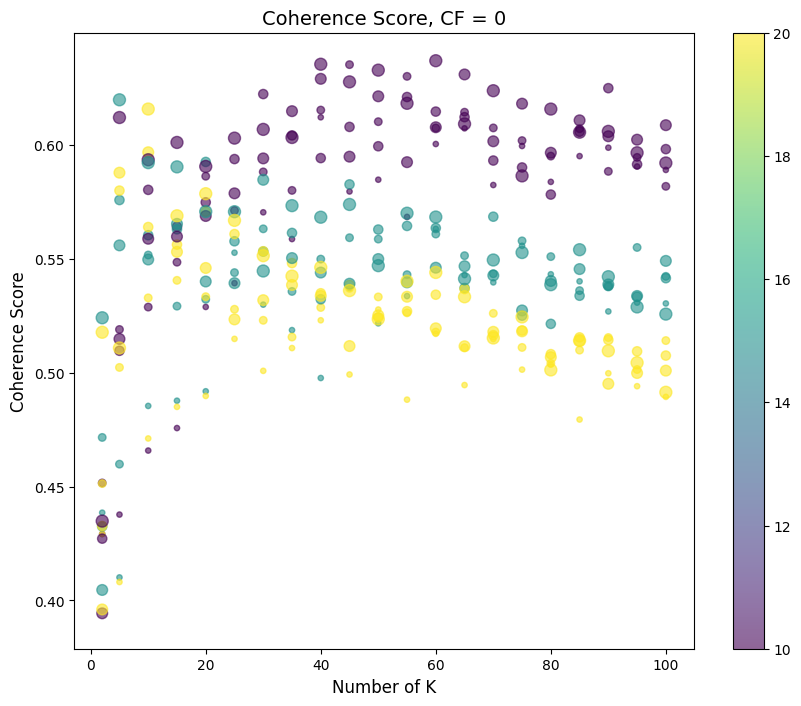

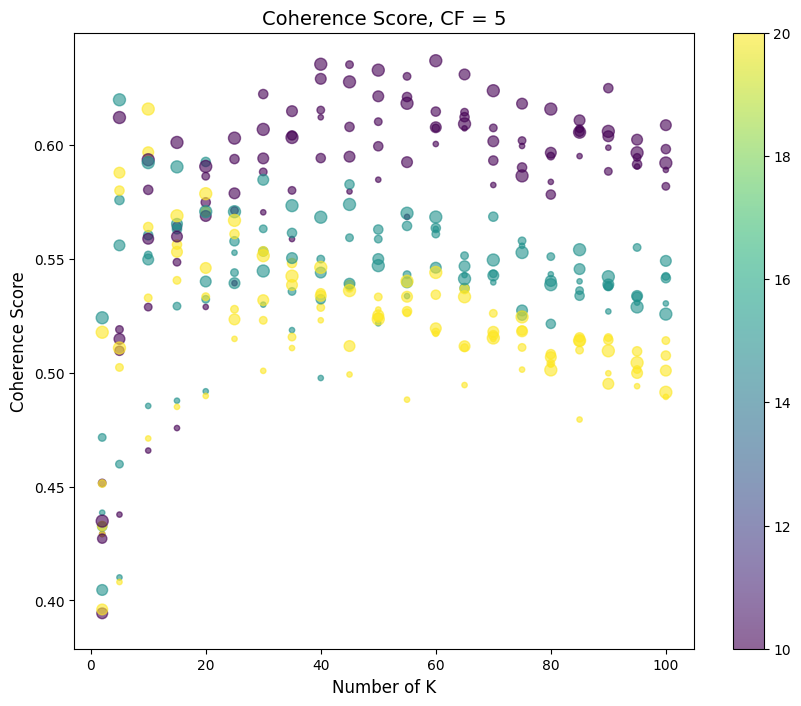

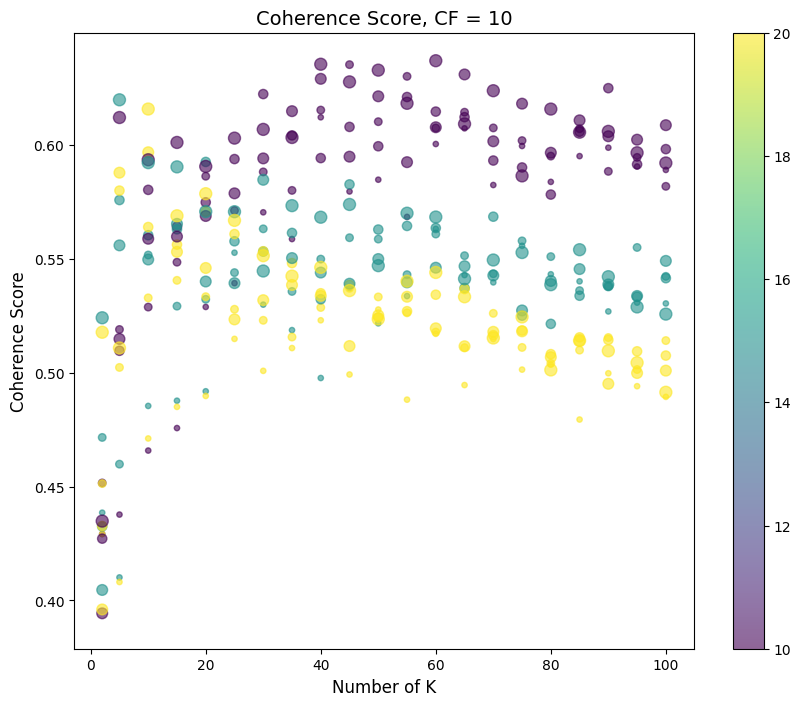

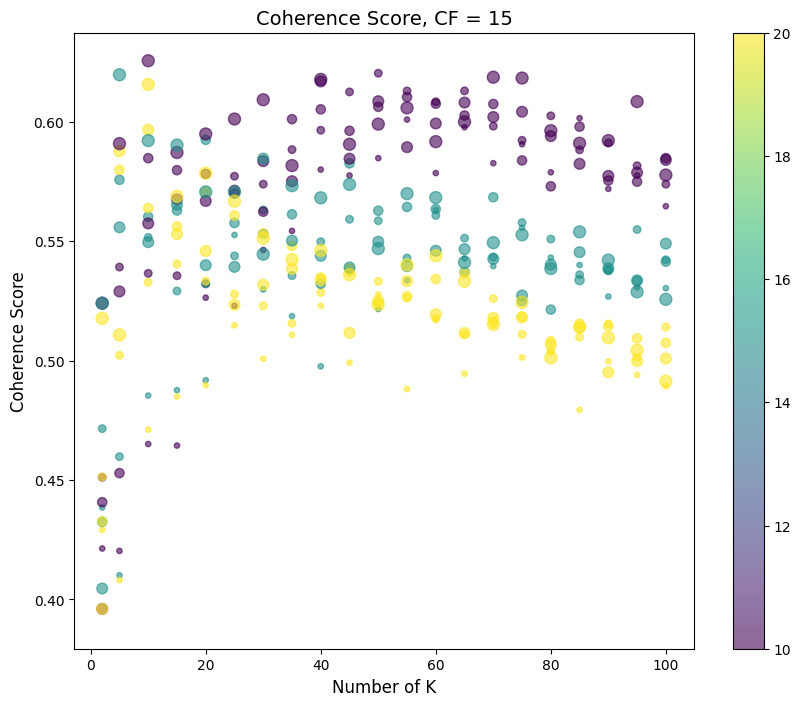

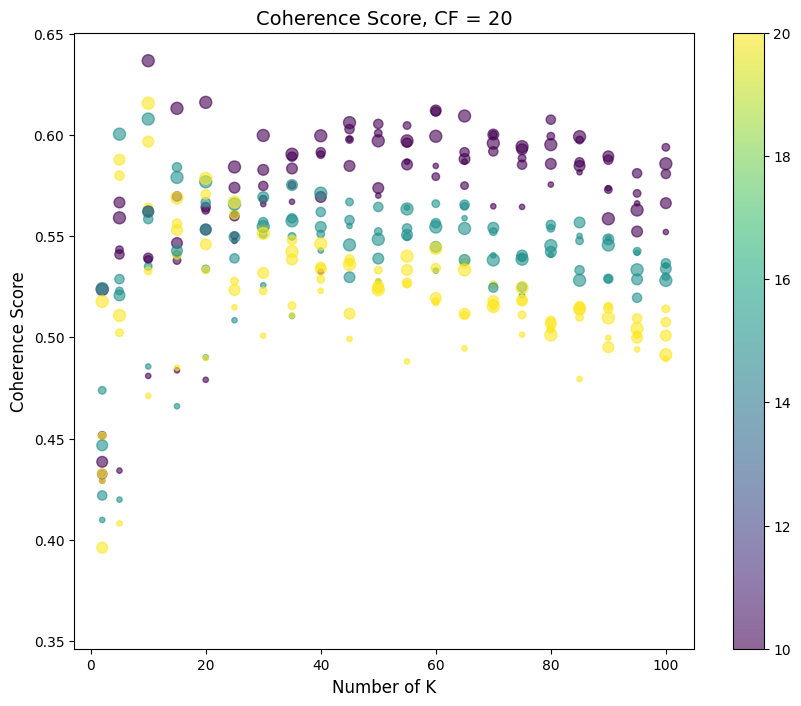

In [122]:
for num_cf in [0, 5, 10, 15, 20]:
  df = dff[dff.Min_Cf == num_cf]
  X_1 = df.K_Num
  X_2 = df.Remove_Top
  X_3 = df.Min_Df
  X_4 = df.Min_Cf
  y = df.C_S_Cv

  plt.scatter(X_1, # x
            y, # y
            alpha=0.6, 
            s=3*X_2, # marker size
            c=X_3, # marker color
            cmap='viridis')

  plt.title(f'Coherence Score, CF = {num_cf}', fontsize=14)
  plt.xlabel('Number of K', fontsize=12)
  plt.ylabel('Coherence Score', fontsize=12)
  plt.colorbar()
  # plt.savefig(main_path + f'FUCKUGOOGLE/종합몰_g-DMR/종합몰_Coherence_Score_CF_{num_cf}_DF_10.png') 
  plt.savefig(main_path + f'FUCKUGOOGLE/투어전문몰_g-DMR/투어전문몰_Coherence_Score_CF_{num_cf}_DF_10.png')
  plt.show()


KeyError: ignored

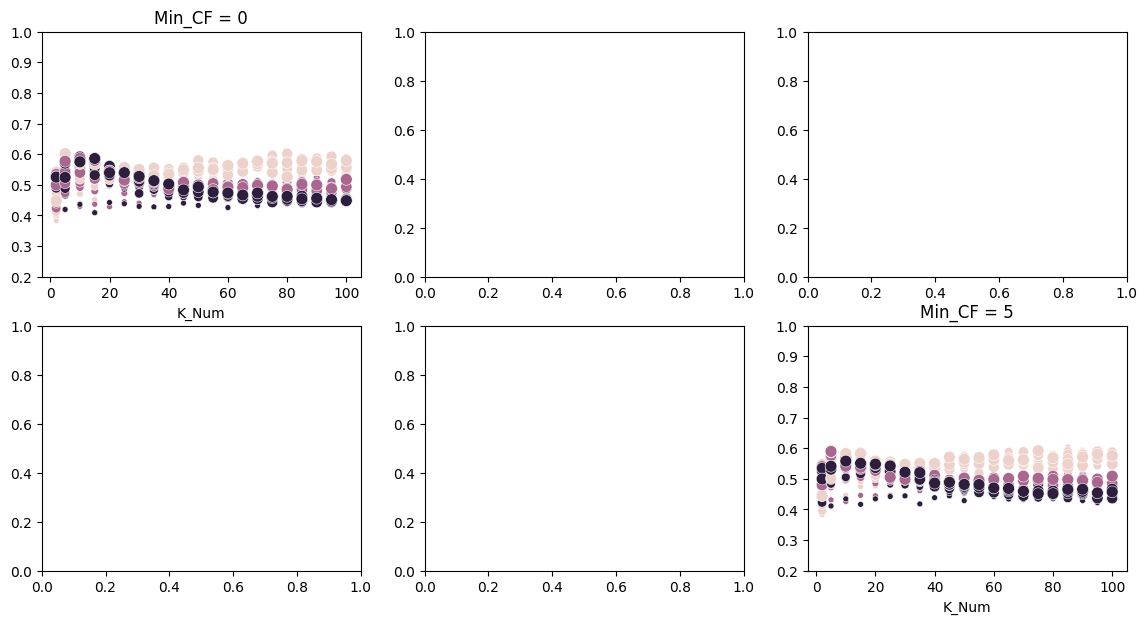

In [ ]:
fig = plt.figure(figsize=(14,7))

widths = [4, 4, 4]
heights = [4, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

for i in [0,5,10,15,20]:
  df = dff[dff.Min_Cf == i]
  X_1 = df.K_Num
  X_2 = df.Remove_Top
  X_3 = df.Min_Df
  y = df.C_S_Cv
  plot = sns.scatterplot(x = df.K_Num , y=df.C_S_Cv, data=df, hue=df.Min_Df, size=1*df.Remove_Top, ax=axs[i], legend = False, )
  plot.set(title = f'Min_CF = {i}')
  plot.set(ylabel=None)

  plot.set(ylim=(0.2, 1))

fig.tight_layout()
fig.savefig(main_path + 'Score_df_투어전문몰.png')

In [ ]:
import os
Path_1 = '/content/drive/MyDrive/Project/LiveCommerse/FUCKUGOOGLE/nonTour_df'
Path_2 = '/content/drive/MyDrive/Project/LiveCommerse/FUCKUGOOGLE/Tour_only_df'
Mall_super_list = os.listdir(Path_1)
Mall_tour_list = os.listdir(Path_2)
Mall_super_list.remove('Complete_list.pkl')
Mall_super_list.remove('Check_list.pkl')
Mall_tour_list.remove('Complete_list.pkl')
Mall_tour_list.remove('Check_list.pkl')

In [ ]:
Mall_tour_list[:50]

['브이패스_38573',
 '에버랜드_67619',
 '아쿠아필드_70207',
 '경주월드_76553',
 '하이원리조트_67444',
 '롯데월드 어드벤처 부산_67238',
 '캐리비안베이_68969',
 '이천 테르메덴_92563',
 '휘닉스 호텔앤드리조트_66849',
 '원마운트 워터파크_72886',
 '반얀트리 클럽 앤 스파 서울_63916',
 '올스테이_62139',
 '서울랜드_76202',
 '와그WAUG_64371',
 '파라다이스시티_70208',
 '오늘의 여행 맛zip_93165',
 '알펜시아리조트_92519',
 '스플라스 리솜_67510',
 '야놀자_69787',
 '에코랜드_89047',
 '중흥골드스파_93318',
 '히든클리프호텔_68114',
 '안성팜랜드_87749',
 '비발디파크 쇼핑라이브_69543',
 '파라다이스 스파 도고_92112',
 'WEPICK_40207',
 '선이몰_18823',
 '보홀트레이더스_67856',
 '웅진플레이도시_89935',
 '설악 워터피아_59387',
 'SEAMARQ HOTEL_68113',
 '라온 더마파크_90368',
 '대구 이월드_93297',
 '캠프통_71784',
 '워커힐_69736',
 '렛스테이_69573',
 '그랜드 하얏트 서울_65305',
 '심플티켓몰_65073',
 '광명동굴_87583',
 '쇼핑나인_89324',
 '